<h2>Regularised Cost Function in ML</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X] # shape: (100, 2)

In [2]:
def compute_cost_with_regularisation(theta, X, y, lambda_):
    m = len(y)
    predictions = X @ theta
    error = predictions - y
    mse = (1 / (2 * m)) * np.sum(theta[1:] ** 2)

    reg_term = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)

    return mse + reg_term

def gradient_descent_with_regularisation(X, y, alpha, lambda_, n_iters):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for i in range(n_iters):
        predictions = X @ theta
        error = predictions - y

        grad = (1 / m) * (X.T @ error)
        grad[1:] += (lambda_ / m) * theta[1:]

        theta -= alpha * grad
        cost = compute_cost_with_regularisation(theta, X, y, lambda_)
        cost_history.append(cost)

    return theta, cost_history

Final parameters: [4.79337372 2.15516098]


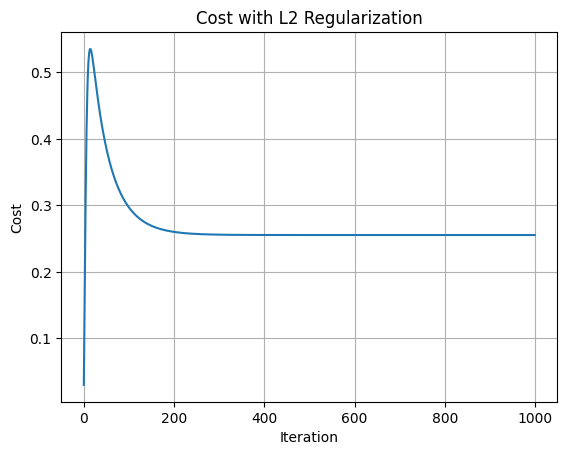

In [3]:
alpha = 0.1
lambda_ = 10
n_iters = 1000

theta_final, cost_history = gradient_descent_with_regularisation(X_b, y, alpha, lambda_, n_iters)

print("Final parameters:", theta_final.ravel())

plt.plot(cost_history)
plt.title("Cost with L2 Regularization")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid()
plt.show()